<a href="https://colab.research.google.com/github/samyukta-15/LGMVIP-DataScience-Task2/blob/main/lgm_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
# scientific computing
import numpy as np

# data manipulation
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Understanding the Data

In [ ]:
# reading data from csv file

df=pd.read_csv("global-terrorism.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2904,197503270005,1975,3,27,NaN,0,NaN,185,Spain,8,Western Europe,Biscay,Bilbao,43.258434,-2.921819,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,80.0,Memorial/Cemetery/Monument,NaN,monument,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2905,197503270006,1975,3,27,NaN,0,NaN,185,Spain,8,Western Europe,Gipuzcoa,Legazpi,43.054361,-2.333641,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,NaN,telephone company,...,NaN,NaN,Explosive,NaN,NaN,0.0,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2906,197503270007,1975,3,27,NaN,0,NaN,217,United States,1,North America,California,Berkeley,37.874043,-122.280022,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",NaN,FBI Office,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),30000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
2907,197503270008,1975,3,27,NaN,0,NaN,217,United States,1,North America,California,Los Angeles,34.097866,-118.407379,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,18,Tourists,98.0,Other Facility,NaN,Panama Govt Tourist Bureau,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1.0,1.0,1.0,1.0,NaN
2908,197503270009,1975,3,27,NaN,0,NaN,217,United States,1,North America,California,Los Angeles,34.097866,-118.407379,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,Costa Rica Consulate,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,4.0,Un,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# (rows, columns)

df.shape

(2909, 135)

In [ ]:
# creating a subset dataframe

df2 = df[['eventid', 'iyear', 'country_txt', 'region_txt', 'city', 'success', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'weapdetail']]

In [ ]:
df2.head(5)

,eventid,iyear,country_txt,region_txt,city,success,attacktype1_txt,targtype1_txt,targsubtype1_txt,weapdetail
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,1,Assassination,Private Citizens & Property,Named Civilian,NaN
1,197000000002,1970,Mexico,North America,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",NaN
2,197001000001,1970,Philippines,Southeast Asia,Unknown,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,NaN
3,197001000002,1970,Greece,Western Europe,Athens,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosive
4,197001000003,1970,Japan,East Asia,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Incendiary


In [ ]:
df2.tail()

,eventid,iyear,country_txt,region_txt,city,success,attacktype1_txt,targtype1_txt,targsubtype1_txt,weapdetail
2904,197503270005,1975,Spain,Western Europe,Bilbao,1,Bombing/Explosion,Private Citizens & Property,Memorial/Cemetery/Monument,Explosive
2905,197503270006,1975,Spain,Western Europe,Legazpi,1,Bombing/Explosion,Business,Retail/Grocery/Bakery,Explosive
2906,197503270007,1975,United States,North America,Berkeley,1,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",Explosive
2907,197503270008,1975,United States,North America,Los Angeles,1,Bombing/Explosion,Tourists,Other Facility,Explosive
2908,197503270009,1975,United States,North America,Los Angeles,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosive


In [ ]:
# (rows,columns)

df2.shape

(2909, 10)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   eventid           2909 non-null   int64 
 1   iyear             2909 non-null   int64 
 2   country_txt       2909 non-null   object
 3   region_txt        2909 non-null   object
 4   city              2909 non-null   object
 5   success           2909 non-null   int64 
 6   attacktype1_txt   2909 non-null   object
 7   targtype1_txt     2909 non-null   object
 8   targsubtype1_txt  2801 non-null   object
 9   weapdetail        2616 non-null   object
dtypes: int64(3), object(7)
memory usage: 227.4+ KB


In [ ]:
df2.columns

Index(['eventid', 'iyear', 'country_txt', 'region_txt', 'city', 'success',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'weapdetail'],
      dtype='object')

In [ ]:
df2.notnull().sum()

eventid             2909
iyear               2909
country_txt         2909
region_txt          2909
city                2909
success             2909
attacktype1_txt     2909
targtype1_txt       2909
targsubtype1_txt    2801
weapdetail          2616
dtype: int64

Top 10 countries with maximum terrorism

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


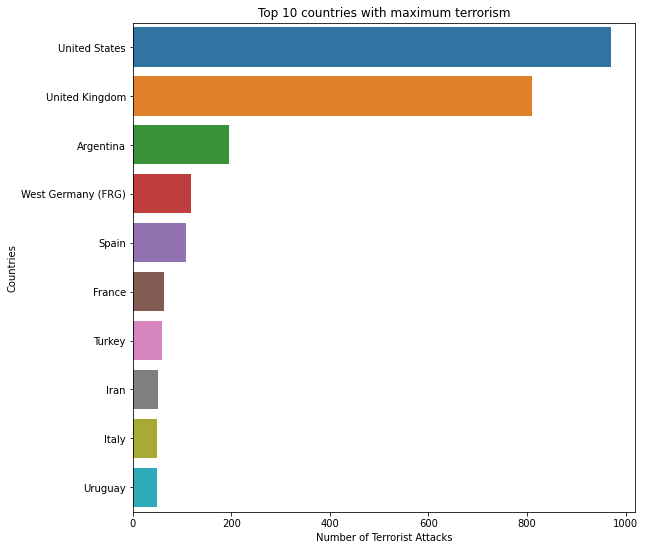

In [ ]:
countries = df2.country_txt.value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(9,9))

x = countries.values
y = countries.index
plt.title("Top 10 countries with maximum terrorism")
plt.xlabel('Number of Terrorist Attacks')
plt.ylabel('Countries')
sns.barplot(x, y);

Top 10 cities with maximum terrorism

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


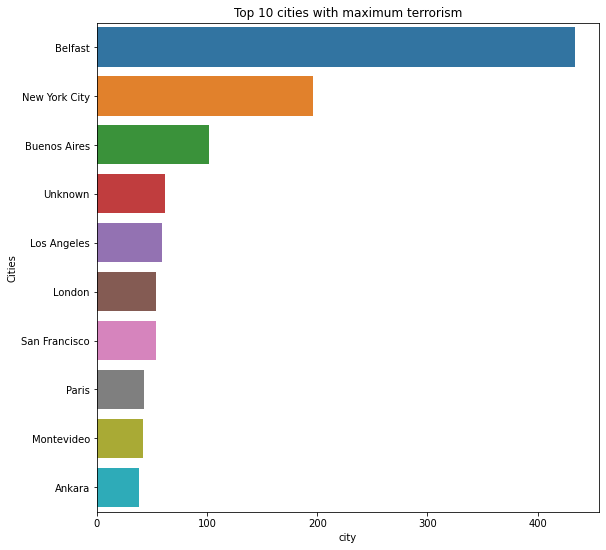

In [ ]:
cities = df2.city.value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(9,9))

x = cities
y = cities.index
plt.title("Top 10 cities with maximum terrorism")
plt.xlabel('Number of Terrorist Attacks')
plt.ylabel('Cities')
sns.barplot(x, y);

In [ ]:
df2.iyear

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
2904    1975
2905    1975
2906    1975
2907    1975
2908    1975
Name: iyear, Length: 2909, dtype: int64

Year-wise terrorism histogram

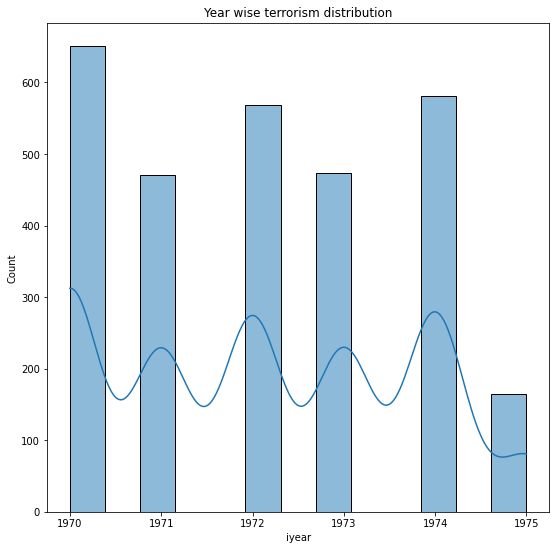

In [ ]:
plt.figure(figsize=(9,9))

plt.title('Year wise terrorism distribution')
sns.histplot(data = df2.iyear, kde = True);

Year-wise Terrorism Count Plot

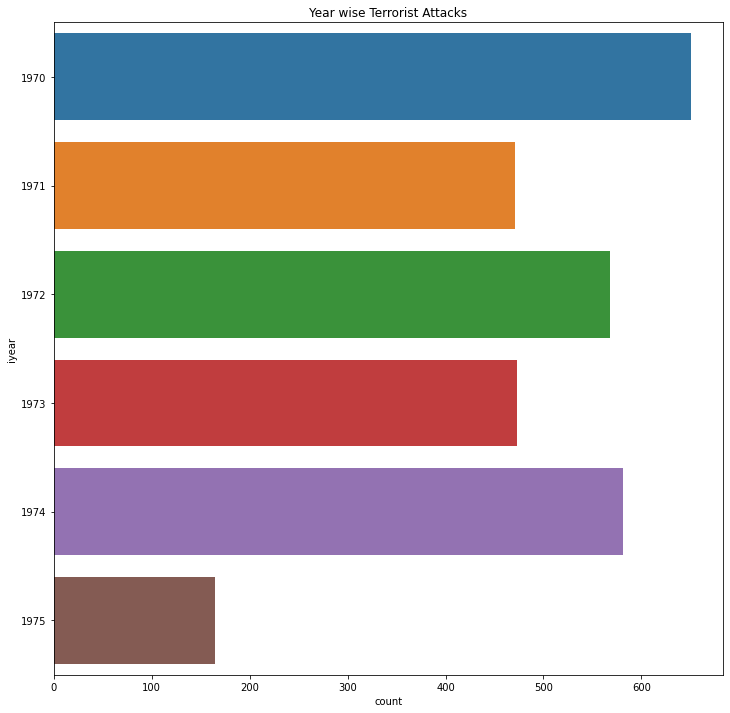

In [ ]:
plt.figure(figsize=(12,12))

plt.title("Year wise Terrorist Attacks")
sns.countplot(y ='iyear', data = df2);

Top 10 years with maximum terrorism

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


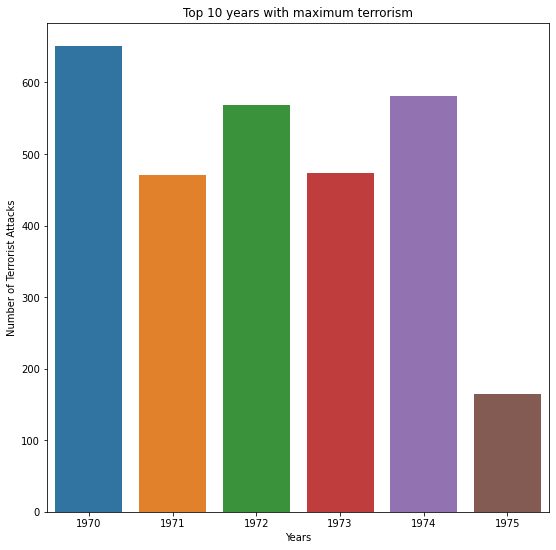

In [ ]:
year = df2.iyear.value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(9,9))

y = year.values
x = year.index
plt.title("Top 10 years with maximum terrorism")
plt.xlabel('Years')
plt.ylabel('Number of Terrorist Attacks')
sns.barplot(x, y);

Top 8 targets of terrorist attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


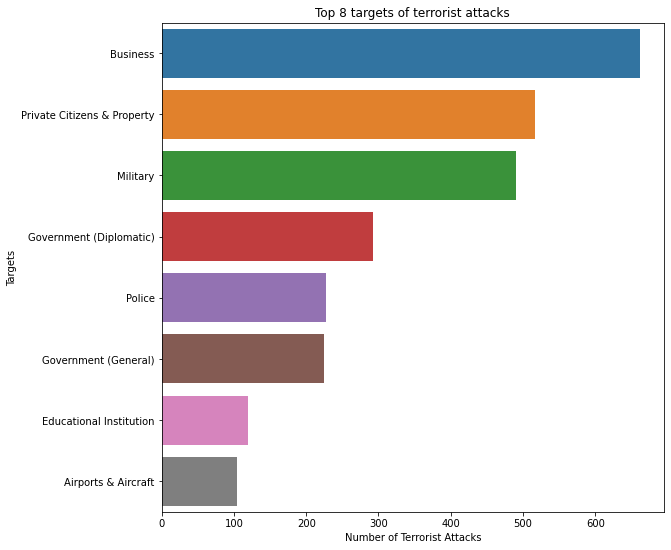

In [ ]:
target = df2.targtype1_txt.value_counts().sort_values(ascending=False).head(8)

plt.figure(figsize=(9,9))

y = target.values
x = target.index
plt.title("Top 8 targets of terrorist attacks")
plt.xlabel('Number of Terrorist Attacks')
plt.ylabel('Targets')
sns.barplot(y, x);

Top 5 weapons used by terrorists

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


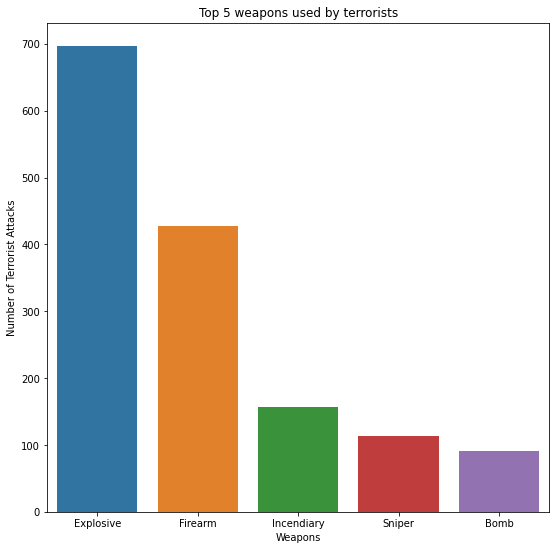

In [ ]:
weapons = df2.weapdetail.value_counts().sort_values(ascending=False).head(5)

plt.figure(figsize=(9,9))

y = weapons.values
x = weapons.index
plt.title("Top 5 weapons used by terrorists")
plt.xlabel('Weapons')
plt.ylabel('Number of Terrorist Attacks')
sns.barplot(x, y);

Success vs Failure of terrorist attacks pie chart

In [ ]:
# number of successful terrorist attacks
success = 0

for i in df2.success.values:

  if i == 1:
    success +=1

# number of failed terrorist attacks
failure = len(df2.success.values) - success

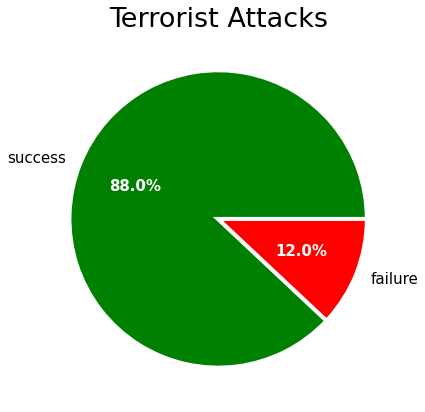

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
data = [success, failure]
labels= ['success', 'failure']
colors = ['green', 'red']

patches, texts, pcts = ax.pie(data, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'}, textprops={"fontsize":15})

plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Terrorist Attacks', fontsize=27)
plt.tight_layout()

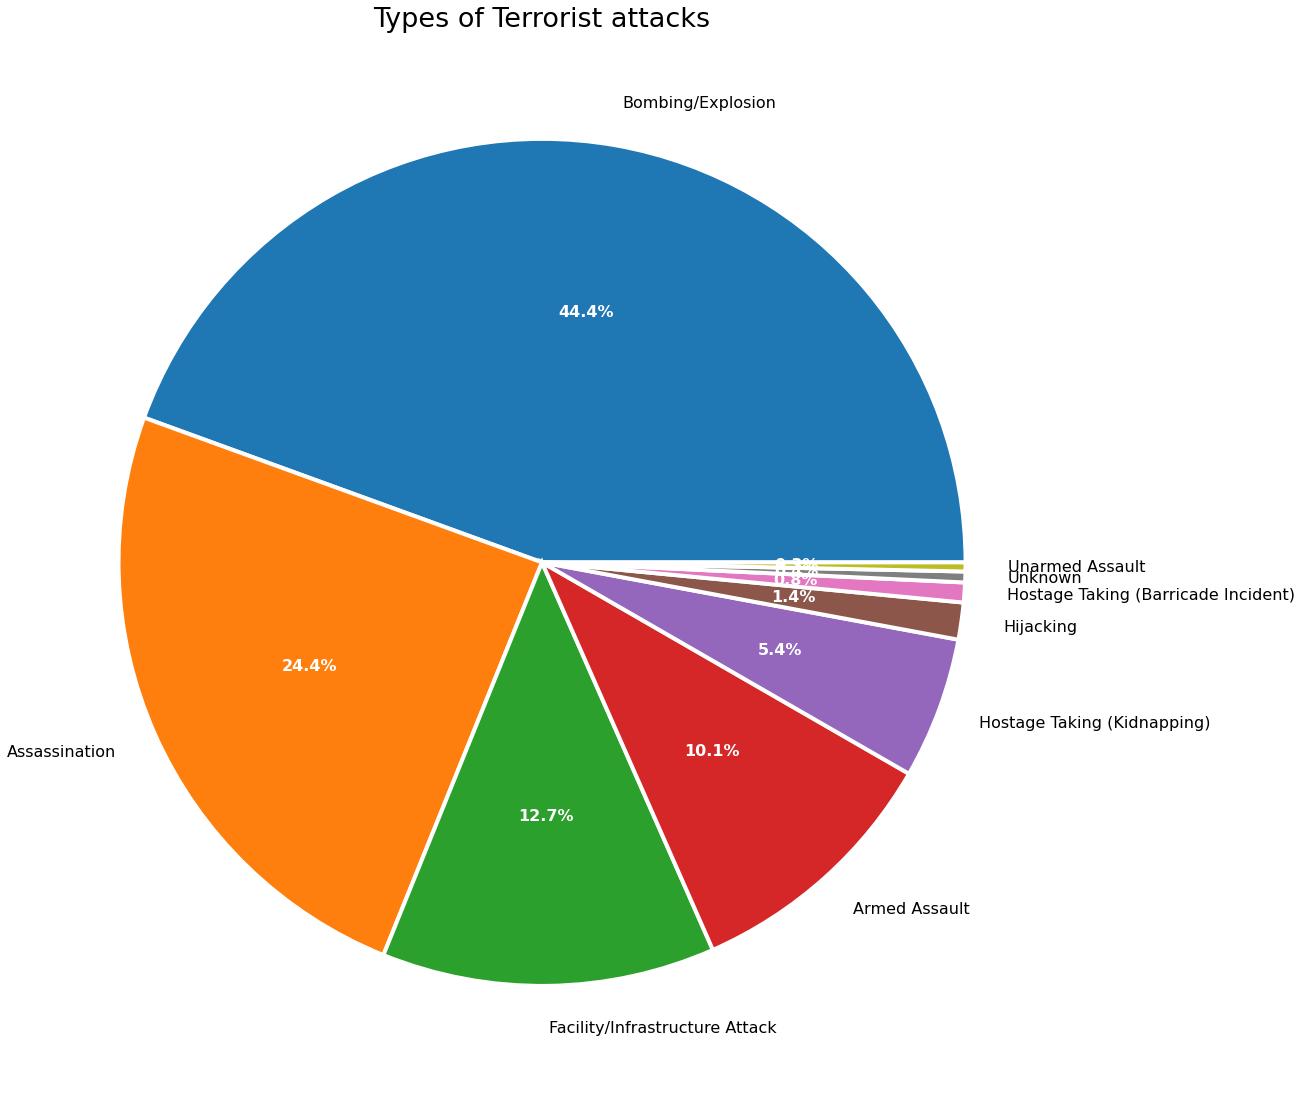

In [ ]:
attack = df2.attacktype1_txt.value_counts()

fig, ax = plt.subplots(figsize=(18, 18))

patches, texts, pcts = ax.pie(attack.values, labels=attack.index, autopct='%.1f%%', wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'}, textprops={"fontsize":16})

plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Types of Terrorist attacks', fontsize=27)
plt.tight_layout()